# NLP Projects

1. Speech Recognition in Python using Google Speech API

In [2]:
pip install SpeechRecognition pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 53.5 MB/s eta 0:00:00


In [3]:
# Upload an audio file (preferably in .wav format)
from google.colab import files
uploaded = files.upload()


Saving I-Wanna-Be-Yours(Pagal-World.Com.In).mp3 to I-Wanna-Be-Yours(Pagal-World.Com.In).mp3


In [4]:
from pydub import AudioSegment

# Replace the filename below with your uploaded file name
filename = list(uploaded.keys())[0]
output_filename = filename.split('.')[0] + '.wav'

# Convert MP3 to WAV
audio = AudioSegment.from_mp3(filename)
audio.export(output_filename, format="wav")

print(f"Converted {filename} to {output_filename}")

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Converted I-Wanna-Be-Yours(Pagal-World.Com.In).mp3 to I-Wanna-Be-Yours(Pagal-World.wav


In [5]:
# Perform Speech Recognition on the uploaded file
import speech_recognition as sr

# Create a Recognizer object
recognizer = sr.Recognizer()

# Replace the filename below with your uploaded file name
# Use the converted WAV file instead of the original MP3
filename = list(uploaded.keys())[0]
output_filename = filename.split('.')[0] + '.wav'

# Read the audio file
with sr.AudioFile(output_filename) as source:
    print("Reading audio...")
    audio_data = recognizer.record(source)

# Recognize speech using Google API
try:
    print("\nRecognized Text:")
    text = recognizer.recognize_google(audio_data)
    print(text)

except sr.UnknownValueError:
    print("Sorry, could not understand the audio.")
except sr.RequestError:
    print("Could not request results from Google Speech Recognition service.")

Reading audio...

Recognized Text:
I want to be a vacuum cleaners open


2. Amazon Product Reviews Sentiment Analysis in Python

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Amazon reviews.csv to Amazon reviews (1).csv


In [ ]:
data = pd.read_csv('/content/Amazon reviews.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
data.dropna(inplace=True)

In [ ]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [ ]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview

data['Review']=data['Review'].apply(clean_review)

In [ ]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sentiment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sentiment'}, axis=1)
              .sort_values('Sentiment', ascending=True))
  xs = counted['Sentiment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Sentiment', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sentiment')
_ = plt.ylabel('count()')

In [ ]:
data['Sentiment'].value_counts()

,count
Sentiment,
0,15000
1,9999


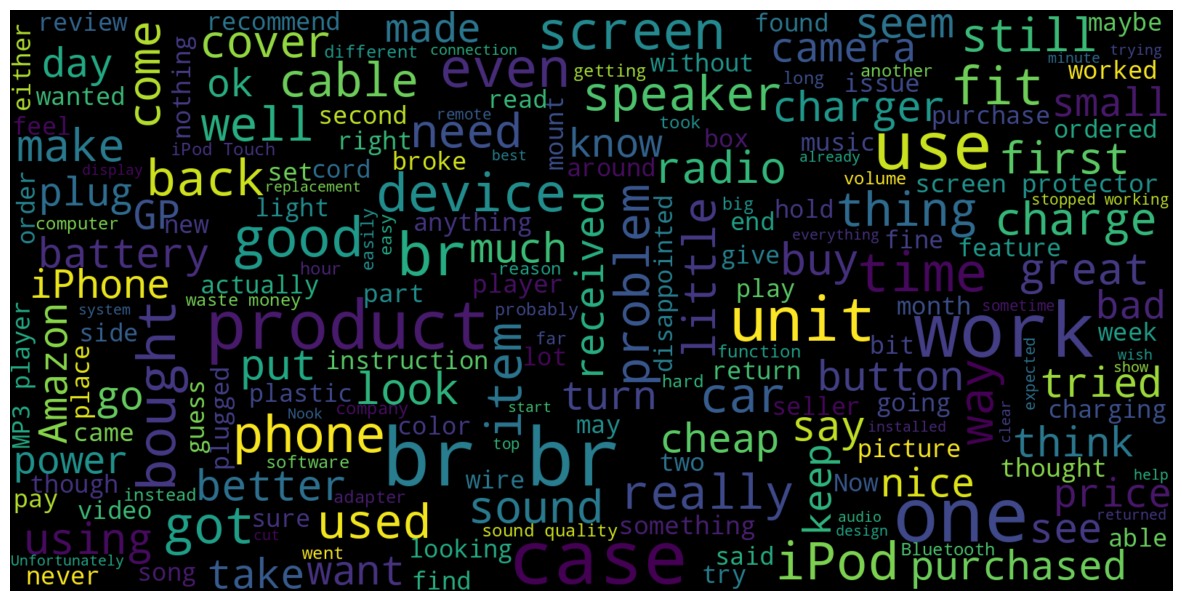

In [ ]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

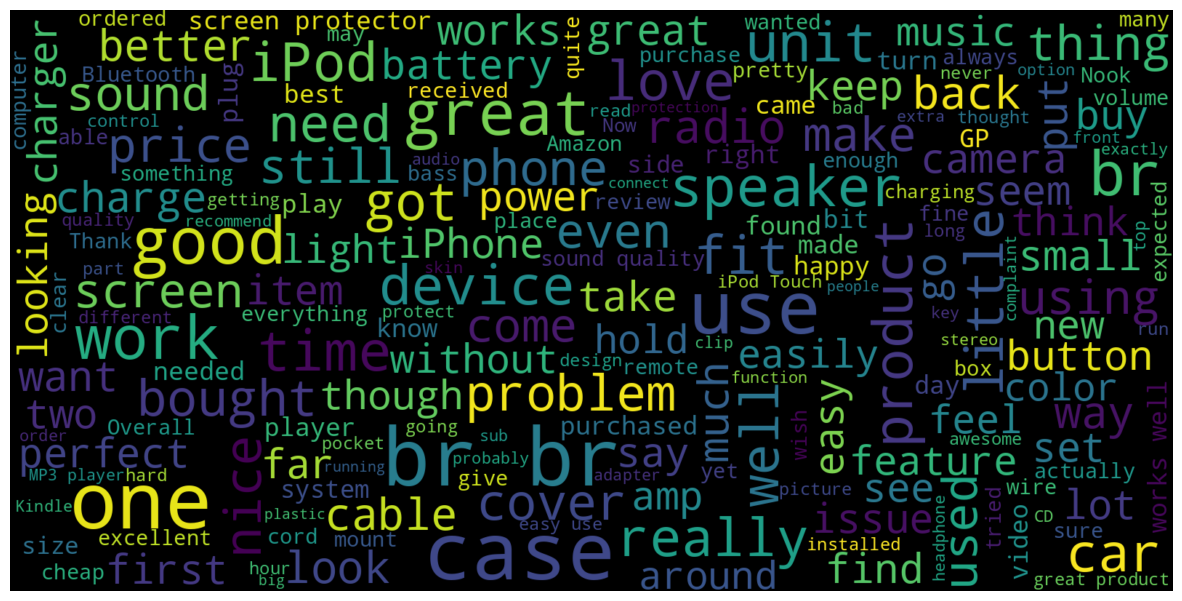

In [ ]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

# This code is modified by Susobhan Akhuli

0.81552


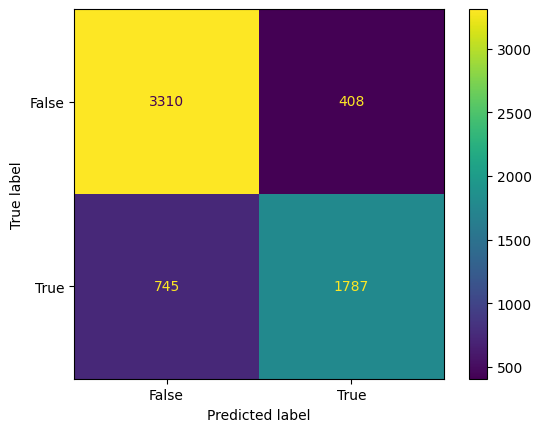

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

# This code is modified by Susobhan Akhuli

3. Sentiment Analysis with an Recurrent Neural Networks (RNN)

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()  # This will open a file picker

# Get the first uploaded file
filename = list(uploaded.keys())[0]




Saving swiggy.csv to swiggy.csv


In [ ]:
# Read CSV
data = pd.read_csv('/content/swiggy.csv')
print("Columns in the dataset:")
print(data.columns.tolist())

Columns in the dataset:
['ID', 'Area', 'City', 'Restaurant Price', 'Avg Rating', 'Total Rating', 'Food Item', 'Food Type', 'Delivery Time', 'Review']


In [ ]:
data["Review"] = data["Review"].str.lower()
data["Review"] = data["Review"].replace(r'[^a-z0-9\s]', '', regex=True)

data['sentiment'] = data['Avg Rating'].apply(lambda x: 1 if x > 3.5 else 0)
data = data.dropna()

In [ ]:
max_features = 5000
max_length = 200

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data["Review"])
X = pad_sequences(tokenizer.texts_to_sequences(data["Review"]), maxlen=max_length)
y = data['sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

In [ ]:
model = Sequential([
    Embedding(input_dim=max_features, output_dim=16, input_length=max_length),
    SimpleRNN(64, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]:.2f}")

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.7064 - loss: 0.6083 - val_accuracy: 0.7156 - val_loss: 0.5973
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7203 - loss: 0.5930 - val_accuracy: 0.7156 - val_loss: 0.5970
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7107 - loss: 0.6013 - val_accuracy: 0.7156 - val_loss: 0.5961
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7220 - loss: 0.5901 - val_accuracy: 0.7156 - val_loss: 0.5969
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7133 - loss: 0.5987 - val_accuracy: 0.7156 - val_loss: 0.5964
Test accuracy: 0.72


In [ ]:
def predict_sentiment(review_text):
    text = review_text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)

    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length)

    prediction = model.predict(padded)[0][0]
    return f"{'Positive' if prediction >= 0.5 else 'Negative'} (Probability: {prediction:.2f})"

sample_review = "The food was great."
print(f"Review: {sample_review}")
print(f"Sentiment: {predict_sentiment(sample_review)}")

Review: The food was great.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Sentiment: Positive (Probability: 0.72)


4. Stock Price Prediction Project using TensorFlow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()  # This will open a file picker

# Get the first uploaded file
filename = list(uploaded.keys())[0]

Saving all_stocks.csv to all_stocks.csv


In [ ]:
data = pd.read_csv('/content/all_stocks.csv')
print("Columns in the dataset:")
print(data.columns.tolist())
print(data.shape)
print(data.sample(7))

Columns in the dataset:
['date', 'open', 'high', 'low', 'close', 'volume', 'Name']
(619040, 7)
              date    open      high     low    close   volume  Name
307383  2016-10-24   66.25   67.0800   65.49   65.790  2269800    IR
52924   2014-01-27   25.00   25.1515   24.37   24.585  2493230   AOS
431945  2015-10-22  254.54  257.4700  253.46  256.980   684618  ORLY
538594  2015-03-12   67.52   68.7500   67.52   68.690  2612487   TJX
28252   2015-04-23   47.48   48.0150   47.48   47.760  1004970   AJG
589821  2016-10-14   55.62   56.4700   54.71   54.840  3832916   WDC
424197  2014-04-28   30.29   30.4550   30.00   30.340  1892559   NWL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


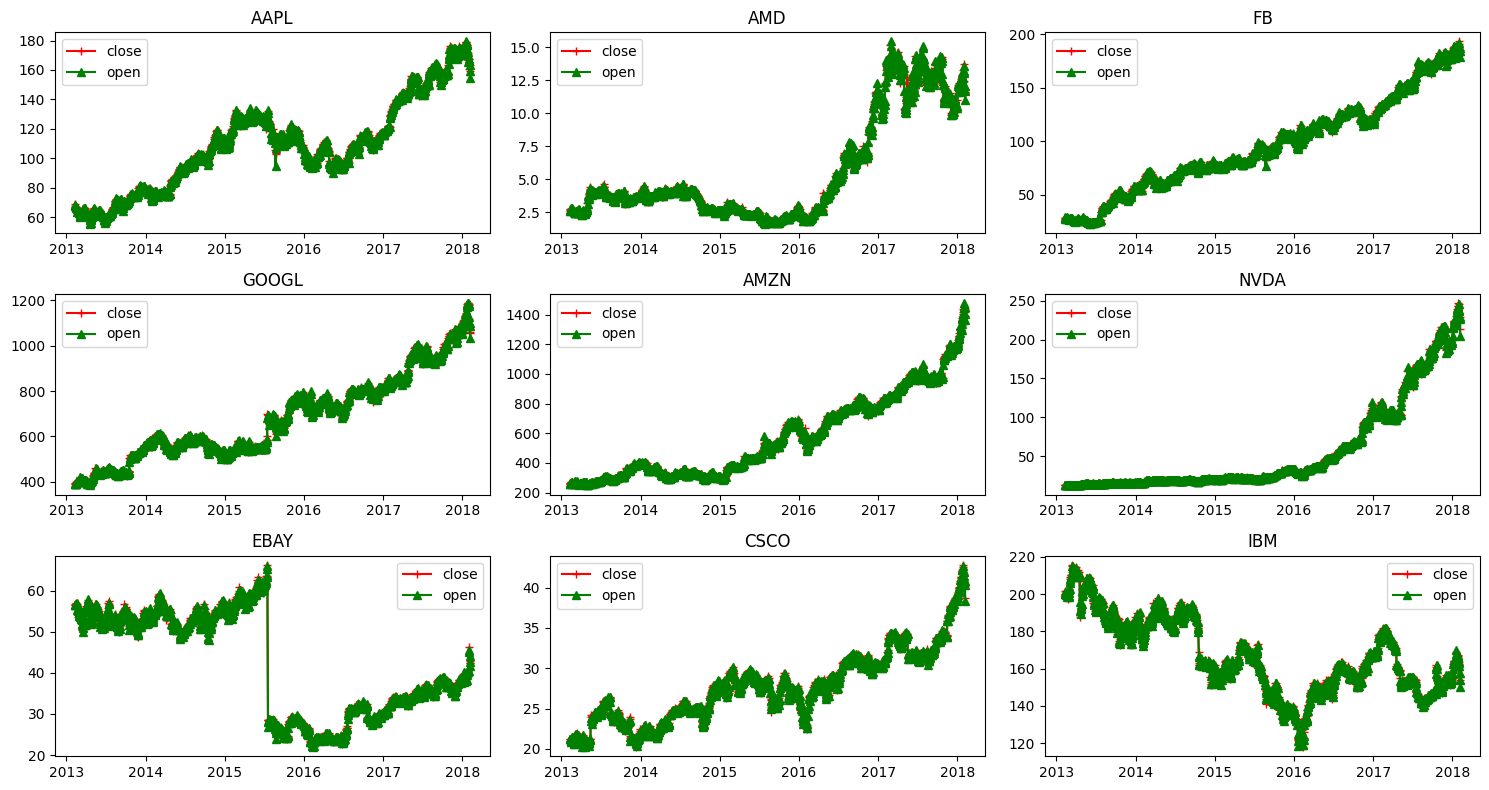

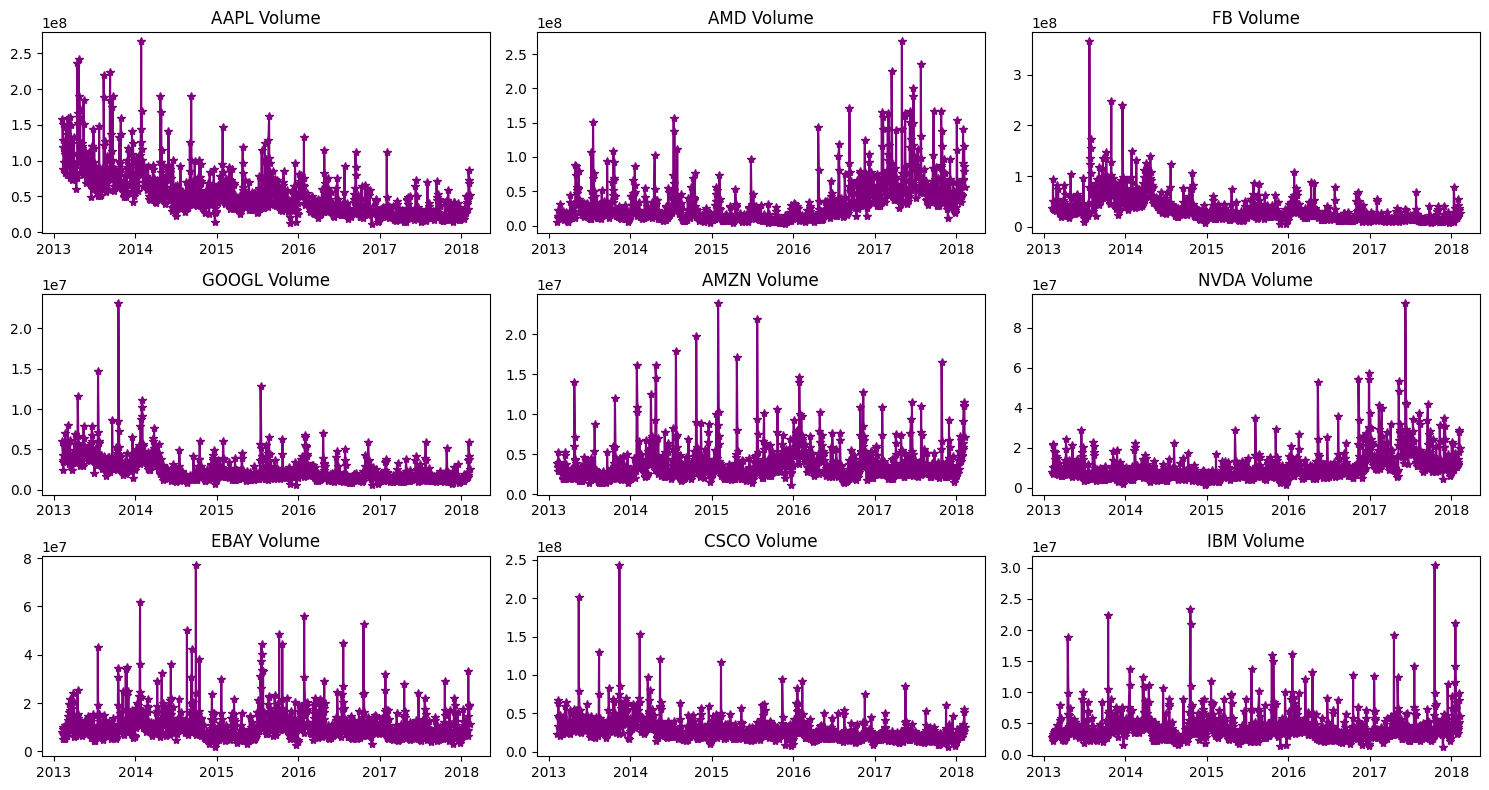

In [ ]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

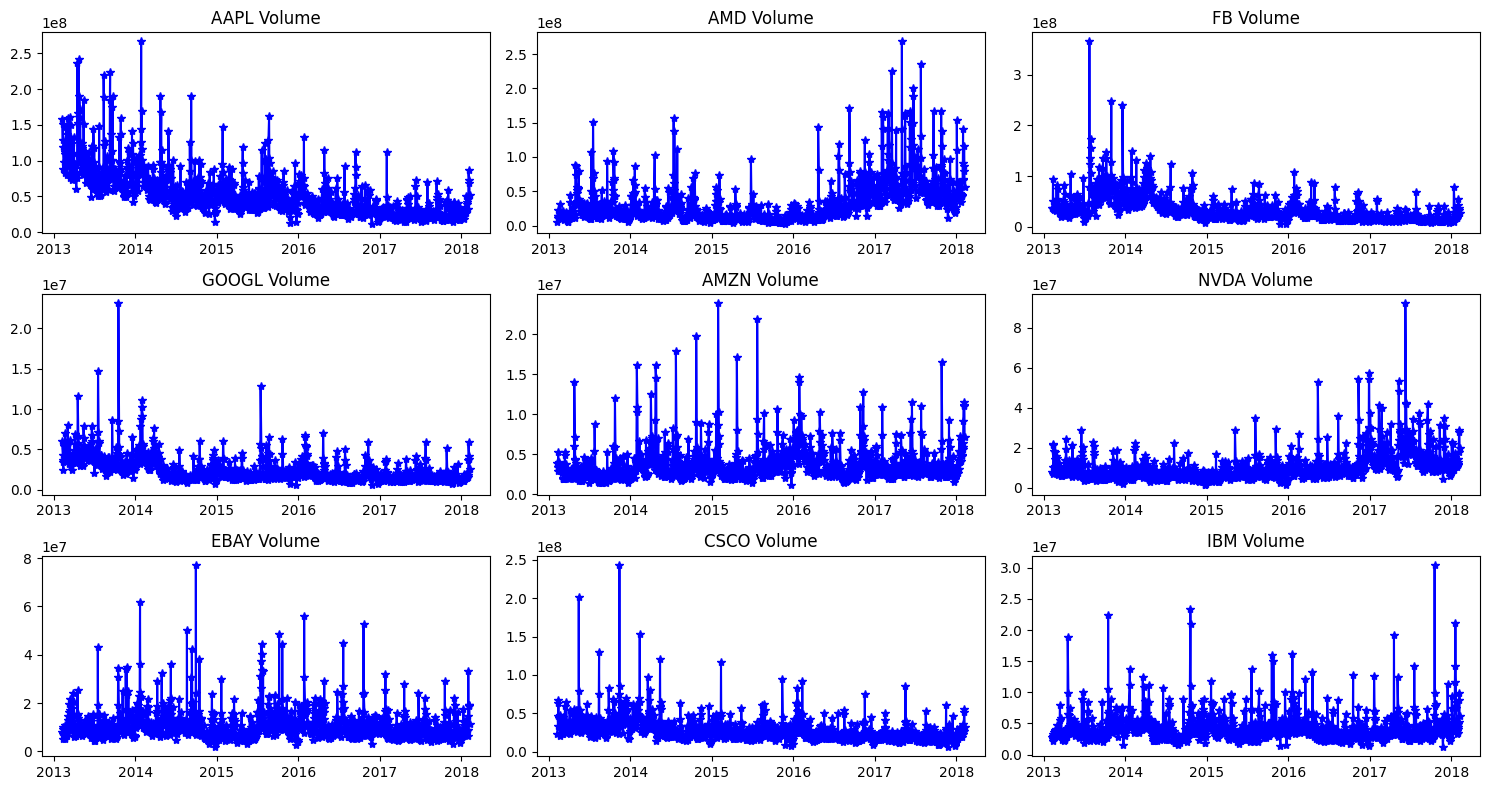

In [ ]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='blue', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

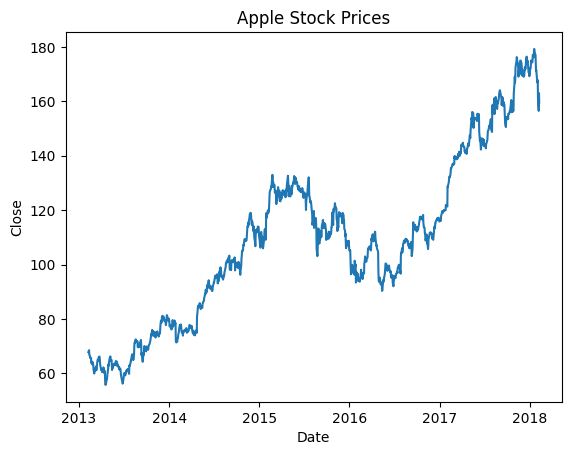

In [ ]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [ ]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0523
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0119
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0085
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0096
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0082
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0070
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0054
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0073
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0064
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0058


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
rmse = np.sqrt(mse)

print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step
MSE 41.32330180894935
RMSE 6.428320294520907


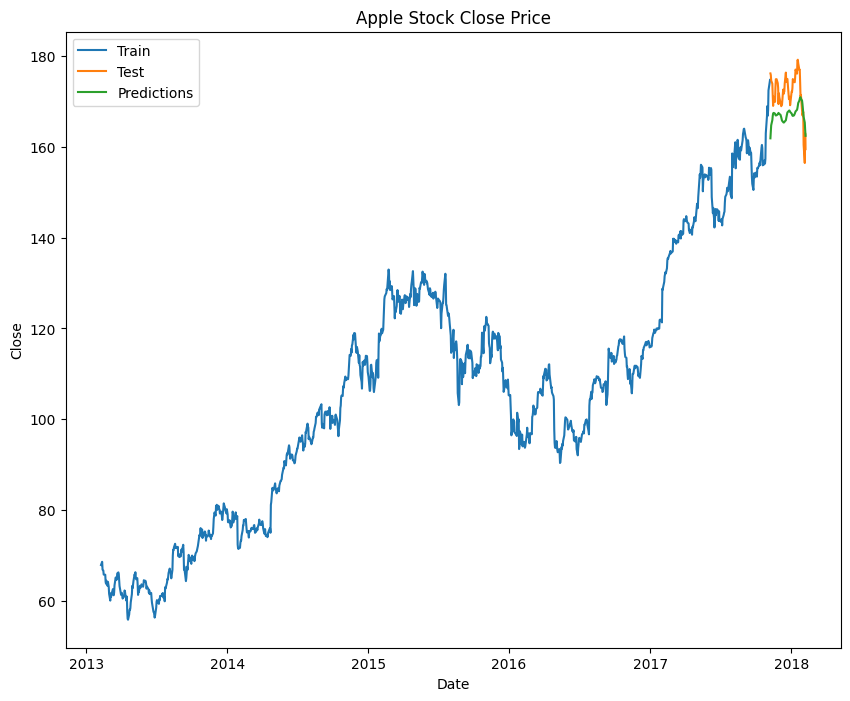

In [ ]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

5. Time Series Forecasting using Recurrent Neural Networks (RNN) in TensorFlow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1092
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0086
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0033
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.2158e-04
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.6889e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7556e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 7.2967e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 6.9593e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.6215e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 6.0136e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.5473e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.2647e-04
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [ ]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 53.62828697536027
Unscaled Root Mean Squared Error (RMSE): 7.323133685476476
Unscaled Mean Absolute Error (MAE): 5.46955146789551


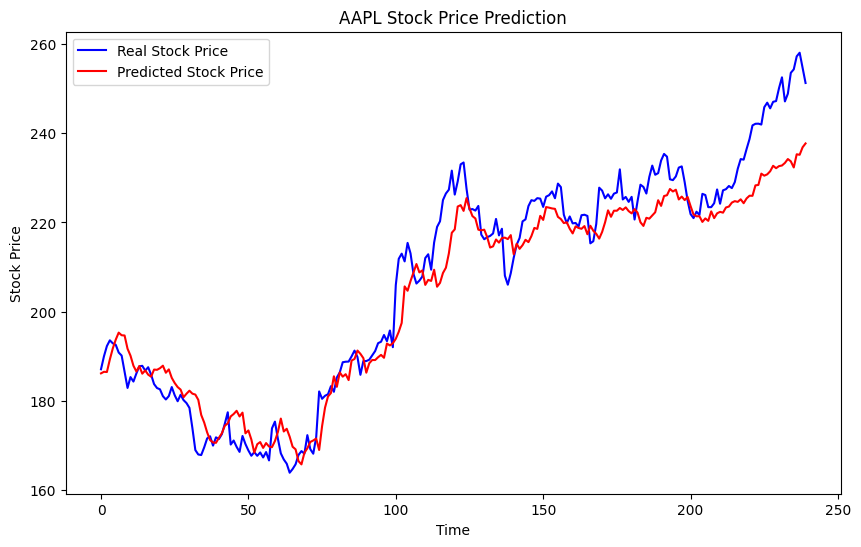

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()